In [1]:
import matplotlib.pyplot as plt
import glob as g
import json

In [4]:
folder = "_output"
fnames = g.glob("../" + folder + "//*.meta.json")

No handles with labels found to put in legend.


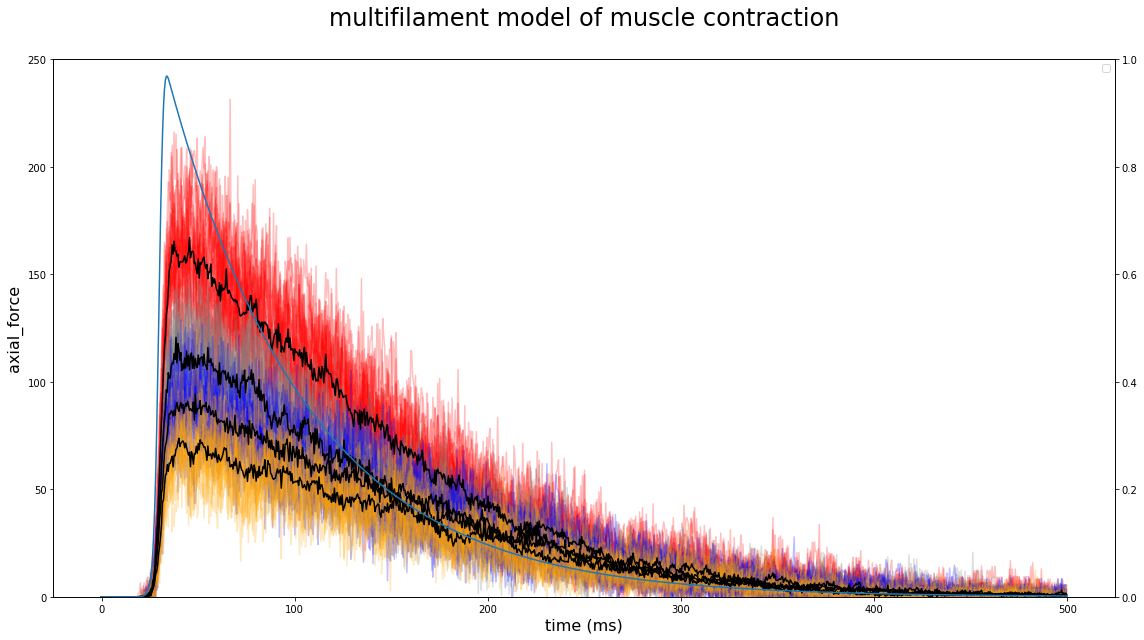

In [27]:
key = "axial_force"
fs = 16

fig, axes = plt.subplots(figsize=(16, 9))

ensemble = {}
for fname in fnames:
    try:
        with open(fname, 'r') as metafile:
            meta = json.load(metafile)
        data_fname = fname.split('.meta')[0] + '.data.json'
        with open(data_fname, 'r') as datafile:
            data = json.load(datafile)
        stiffness = float(meta['comment'])
        if stiffness in ensemble.keys():
            ensemble[stiffness].append([meta, data])
        else:
            ensemble[stiffness] = [[meta, data]]
    except FileNotFoundError:
        pass

colors = {20:'red',
         60:'gray',
         80:'blue',
         100:'orange',}
averages = {}
for stiffness, files in sorted(ensemble.items()):
    avg = None
    for run in files:
        meta = run[0]
        data = run[1]
    
        time_trace = data['timestep'].copy()
        for i in range(len(time_trace)):
            time_trace[i] *= data['timestep_length']
        axes.plot(time_trace, data[key], label=stiffness, color=colors[stiffness], alpha=0.25)

        # update average
        if avg is None:
            avg = data[key]
        else:
            for i in range(len(avg)):
                avg[i] += data[key][i]
    for i in range(len(avg)):
        avg[i] /= len(files)
        
    averages.update({stiffness:avg})

for stiffness, avg in averages.items():
    axes.plot(time_trace, avg, label=stiffness, color='black')

title = "multifilament model of muscle contraction\n"
plt.title(title, fontsize=fs*1.5)
plt.xlabel("time (ms)", fontsize=fs)
plt.ylabel(key, fontsize=fs)

axes.set_ylim(0, 250)

ax2 = plt.twinx()
ax2.plot(time_trace, data['actin_permissiveness'])
ax2.set_ylim(0, 1.0)
plt.legend()
plt.tight_layout()

In [ ]:
fnames = g.glob("../_fixedTransitionRate//*.meta.json")

In [ ]:
key = "axial_force"
fs = 16

fig, axes = plt.subplots(figsize=(16, 9))

ensemble = {}
for fname in fnames:
    try:
        with open(fname, 'r') as metafile:
            meta = json.load(metafile)
        data_fname = fname.split('.meta')[0] + '.data.json'
        with open(data_fname, 'r') as datafile:
            data = json.load(datafile)
        ensemble[float(meta['comment'])] = [meta, data]
    except FileNotFoundError:
        pass
    
for stiffness, files in sorted(ensemble.items()):   
    meta = files[0]
    data = files[1]
    
    time_trace = data['timestep'].copy()
    for i in range(len(time_trace)):
        time_trace[i] *= data['timestep_length']
    axes.plot(time_trace, data[key], label=meta['comment'])

plt.legend()

title = "multifilament model of muscle contraction\n"
plt.title(title, fontsize=fs*1.5)
plt.xlabel("time (ms)", fontsize=fs)
plt.ylabel(key, fontsize=fs)

ax2 = plt.twinx()
ax2.plot(time_trace, data['actin_permissiveness'])
    

plt.tight_layout()